# <center> Astronomical Data (Tabular) - Visualizations

## In this notebook, we shall cover ~
- Understand an Astronomical Tabular Data
- Create effective Visualizations using Matplotlib and Seaborn
- Understand why a specific Visualization is used for respective task

## Note
- You may have to re-run code cells whenever we change the style of the plots to exactly see the output!

## Exploring and Understanding the Star Type Data
- CSV data link:- https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-

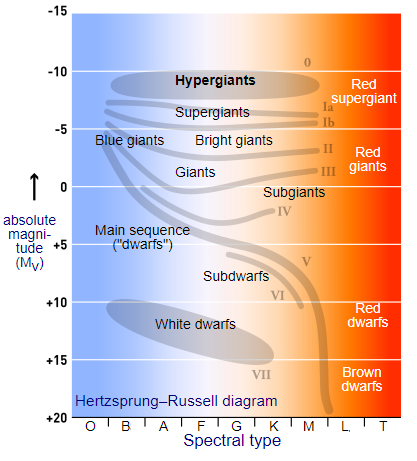

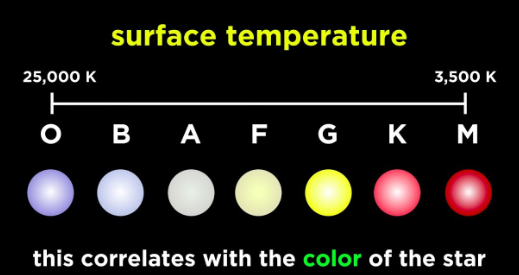

In [46]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Look at the data by creating a pandas data frame
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
49,33750,220000.000000,26.0000,-6.100,4,Blue,B
161,11567,251000.000000,36.0000,-6.245,4,Blue,O
30,39000,204000.000000,10.6000,-4.700,3,Blue,O
0,3068,0.002400,0.1700,16.120,0,Red,M
183,3218,0.000452,0.0987,17.340,0,Red,M
181,2914,0.000631,0.1160,18.390,0,Red,M
91,4526,0.153000,0.8650,6.506,3,Yellow-White,K
96,5112,0.630000,0.8760,4.680,3,Red,K
159,37800,202900.000000,6.8600,-4.560,3,Blue,O
113,3399,117000.000000,1486.0000,-10.920,5,Red,M


In [62]:
# Check general information about the dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Observations
**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
**2)** Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

**3)** It consists of some different features of stars. Information on the star type is given below,       
- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants

### Create a directory to save different Visualizations

In [49]:
# Create a directory to save the visualizations
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok = True)
base_dir = f'/content/{folder_name}/'

###Visualize the count of stars for each type of a star


Matplotlib

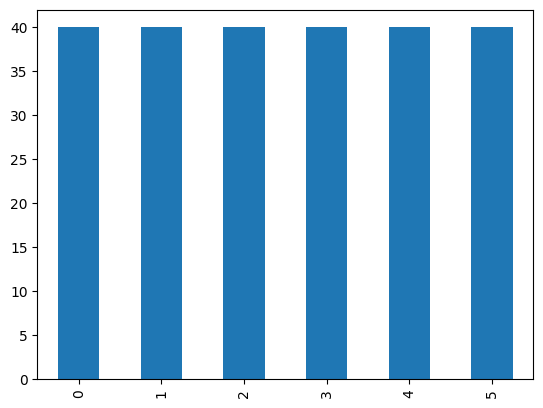

In [50]:
# Bar chart to visualize the count of stars with respective type
plt.style.use('default')
star_df['Star type'].value_counts().plot(kind = 'bar')
plt.show()

### Customize the above plot and save it
- Adjust the size of the figure according to your convinience
- Add the value of counts on top of bars
- Set the background to dark
- Change the color of each bar
- Add a title
- Add y label and change color of y ticks
- Replace x ticks from 0, 1, 2, 3, 4, 5 to respective names of star type
- Save the plots in base directory

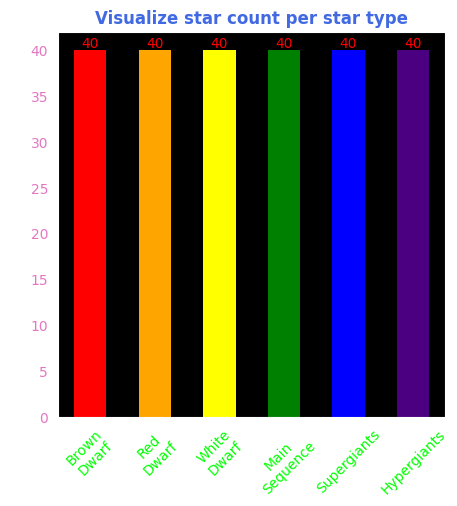

In [51]:
# Customize the plot
plt.figure(figsize=(5, 5))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize star count per star type', color='royalblue', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('# of Stars', color='white', fontsize=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
           rotation=45, color='lime')
plt.savefig(base_dir+'barplot_star_count.png')
plt.show()

### Use seaborns barplot to compare it with the above bar chart

(Matplotlib + Seaborn)

<ipython-input-52-ec78f787c344>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = star_df['Star color'].value_counts().index,


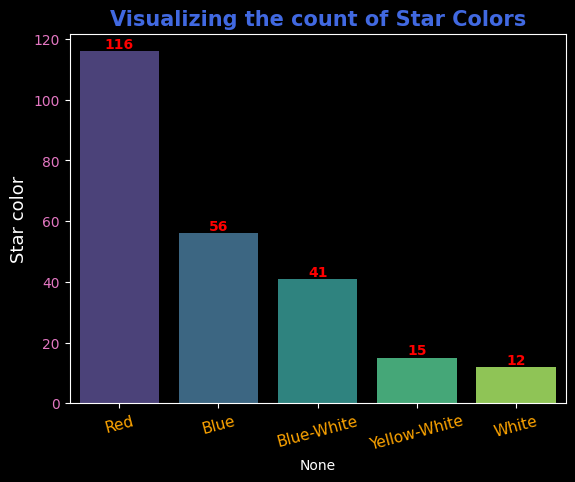

In [52]:
# Visualizing the Star color data
ax = sns.barplot(x = star_df['Star color'].value_counts().index,
                 y = star_df['Star color'].value_counts(),
                 palette = 'viridis')

for container in ax.containers:
    ax.bar_label(container, color='red', weight='bold')

plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star color',color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.savefig(base_dir+'star_colors_viz.png')
plt.show()

- So you see how seaborn is built on matplotlib? It is using all functionalities of matplotlib to customise it the way you want.

- Moreover, it makes it easy for us to do customizations too!


### Visualize outliers if any by creating boxplots for numeric features
- We will be creating subplot for all the numeric features.
- When we create multiple plots inside one figure that is what we refer to as the subplot.
- It needs to know how many rows and columns to use to create different plots.
- ```plt.subplot(rows, cols, position)``` here position indicates out of all the rows & columns, which position to plot in.
- For example, ```plt.subplot(2, 3, 2)``` means that create a plot on the second postion of 6 available positions.

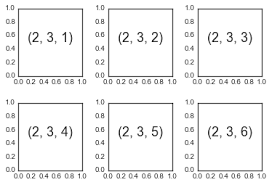

In [53]:
# Get a gist of the data again by checking the top 5 rows of the data
star_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


- First four columns is what we are looking forward to!
- We can have a subplot with 1 row and 4 columns to visualize this.

<ipython-input-65-d57b9069b66b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = star_df['Star type'], y = star_df.iloc[:, i], palette = 'magma')
<ipython-input-65-d57b9069b66b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = star_df['Star type'], y = star_df.iloc[:, i], palette = 'magma')
<ipython-input-65-d57b9069b66b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = star_df['Star type'], y = star_df.iloc[:, i], palette = 'magma')
<ipython-input-65-d57b9069b66b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is 

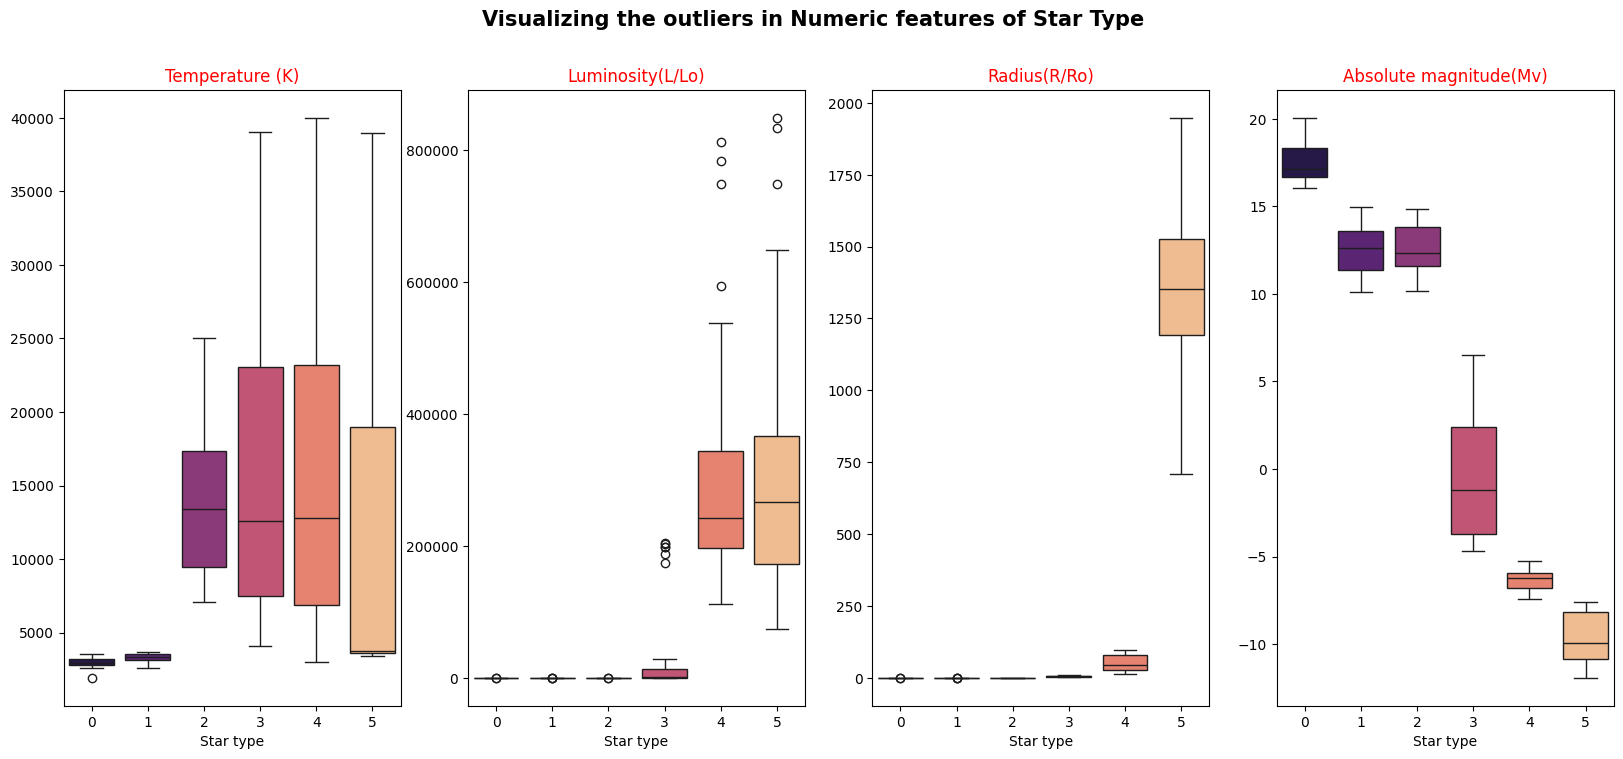

In [65]:
# Visualize outliers in the data
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='black', weight='bold', fontsize=15)

for i in range(4):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x = star_df['Star type'], y = star_df.iloc[:, i], palette = 'magma')
    plt.title(star_df.columns[i], color='red')
    plt.ylabel('')

# Saving the figure
plt.savefig(base_dir+'boxplot_star_type.png')

**0** → Brown Dwarf      
**1** → Red Dwarf       
**2** → White Dwarf       
**3** → Main Sequence      
**4** → Supergiants      
**5** → Hypergiants

- With respect to star type we can see the statistical distribution of the numerical features.

### Create line plots

In [55]:
def line_subplot(star_df, colors, i):
  """
  This will create subplot within for loop

  Parameters
  ----------
  - star_df: data frame
  - colors: colors to display on plot
  - i: index of the iteration

  Generates
  ------
  - subplot on all axes with respective plots and titles
  """
  plt.subplot(4, 1, i+1)
  plt.plot(star_df.iloc[:,i], color=colors[i])
  plt.title(star_df.columns[i], color='red')

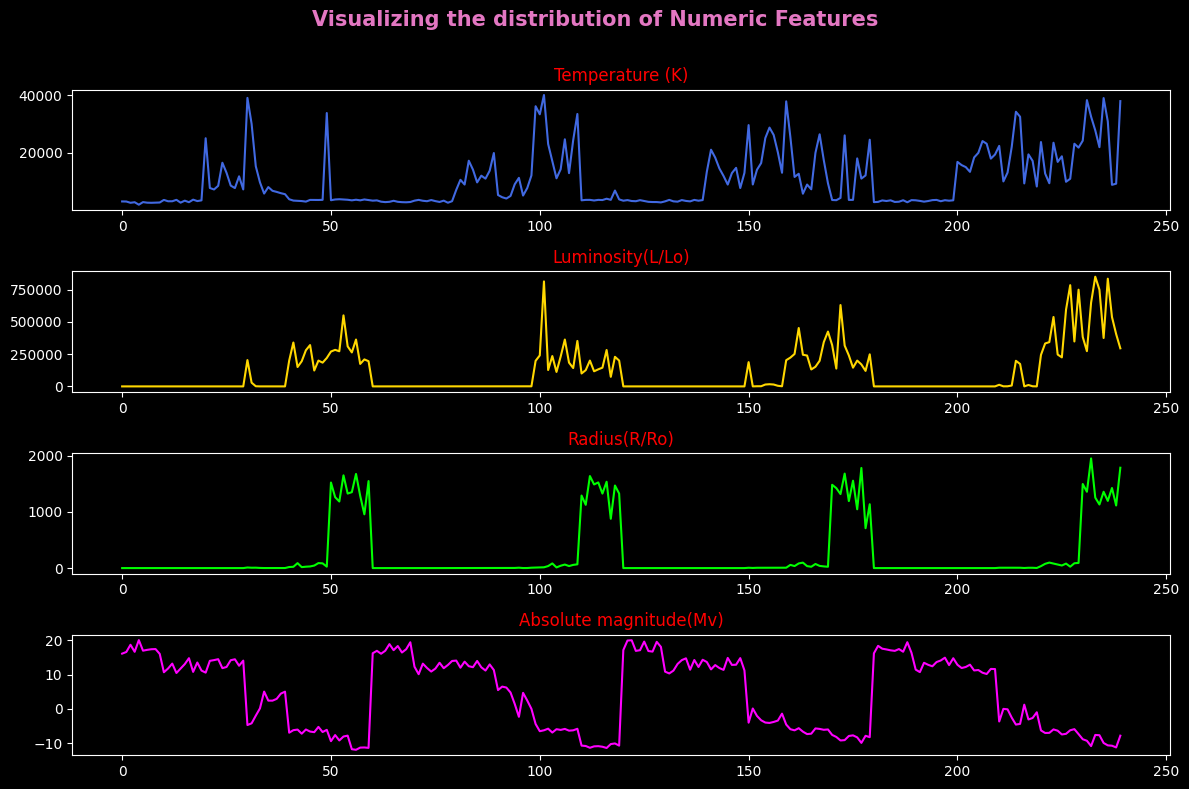

In [63]:
# Line Plots

# Colors to add in line plots
colors = ['royalblue', 'gold', 'lime', 'magenta']

# Add figure size and title to subplot
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.suptitle('Visualizing the distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

# Use for loop and the function that creates subplot of line plots
for i in range(4):
  line_subplot(star_df, colors, i)

# Use tight_layout() to automatically adjust the spacing in subplot
plt.tight_layout()

# Save the figure
plt.savefig(base_dir+'line_subplot.png')
plt.show()

### Create scatter plot
- It will give you the scatter plot by default and you can change the kind of plot you want for of all variables with each other.
- It gives all the plots together without using subplot manually.
- That's the power of seaborn! But it has a disadvantage as well.
- If you have a lot more features in your dataset then it would be too time consuming to run this + it won't be properly visible.
- However, as we have less features let's obtain scatter pairplot with hue being set to Spectral Class.
- Hue will allow us to compare two different features with respect to the spectral class.

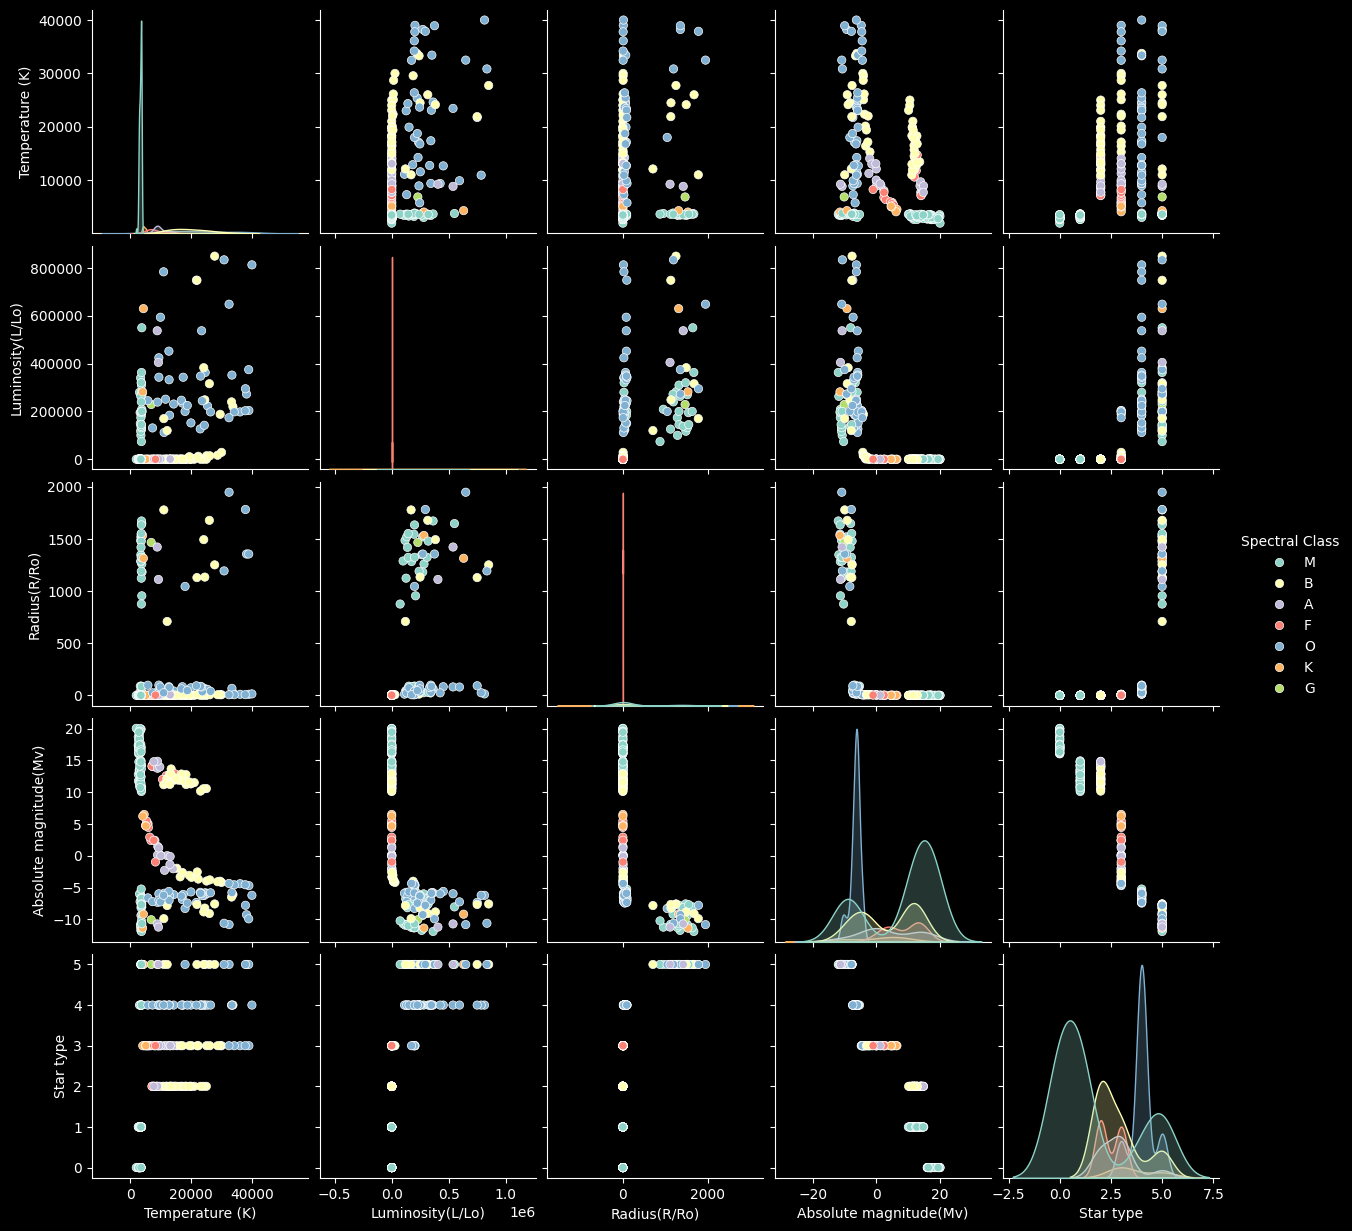

In [57]:
# Get a pairplot - scatter
plt.style.use('dark_background')
sns.pairplot(star_df, hue='Spectral Class')
plt.savefig(base_dir+'pairplot.png')
plt.show()

### Create a scatter plot of HR diagram
- Using the information we have in our star_df let us try to create something like this:-
<img src = 'https://www.space.fm/astronomy/images/diagrams/hr.jpg'>

**0** → Brown Dwarf      
**1** → Red Dwarf       
**2** → White Dwarf       
**3** → Main Sequence      
**4** → Supergiants      
**5** → Hypergiants

In [58]:
# Arrays to be used in the for loop
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

# Python dictionaries --> Made of key value pairs --> To be used to get properties of star_type
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

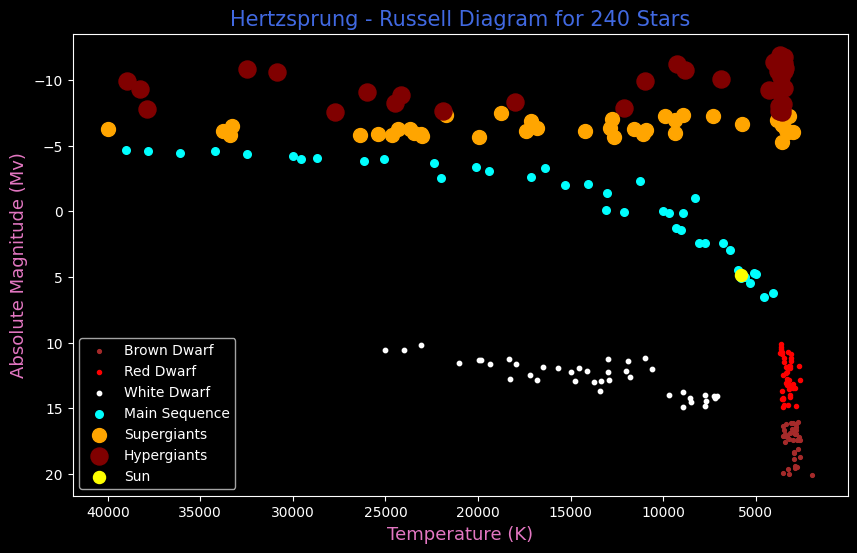

In [59]:
# Plotting an HR diagram for Temperature vs Absolute Magnitude


# Empty list and set to store ax and label of star_type
axes = []
labels = set()

plt.figure(figsize = (10, 6))

# For each and every star in the data
for i in range(len(star_type)):

  # Get its properties with its star_type from python dictonary
  properties = star_types[star_type[i]]

  # if label is not present in set labels
  if properties['label'] not in labels:
    # Then create the axis
    ax = plt.scatter(temperature[i], abs_mag[i],
                    s = properties['size'],
                    c = properties['color'],
                    marker = properties['marker'],
                    label = properties['label'])
    # Add it to axes list
    axes.append(ax)
    # Also add label to the labels set
    labels.add(properties['label'])
  # Else if the label already exist
  else:
    # Then don't save the axes nor add the label to labels set
    plt.scatter(temperature[i], abs_mag[i],
                s = properties['size'],
                c = properties['color'],
                marker = properties['marker'],
                label = properties['label'])

# Adding data for sun
ax_sun = plt.scatter(5778, 4.83, s = 75, c = "yellow", marker = 'o', label = "Sun")
axes.append(ax_sun)
labels.add("Sun")

# Add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize = 15, color='royalblue')

# Add labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize = 13, color = 'tab:pink')
plt.xlabel("Temperature (K)", fontsize = 13, color = 'tab:pink')

# Visualize the labels only for the axes handles
plt.legend(handles = axes)

# Invert the axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Save Figure
plt.savefig(base_dir+'hr_diagram.png')
plt.show()

- So there we have it, isn't it just looking beautiful!
- You have succesfully created some basic to advanced visualizations using Python in today's session on a tabular data.

## Extract the output folders
- That's it, we are done creating multiple visualizations using two different data.
- Let's extract them and save it in your system.

In [66]:
'''This shall work only in Google Colab'''
from google.colab import files                            # import files from colab module of google
!zip -r /content/star_plots.zip /content/star_plots       # create a zip file of the folder in the same location where we created the base directory
files.download('/content/star_plots.zip')                 # download the zip file

updating: content/star_plots/ (stored 0%)
updating: content/star_plots/boxplot_star_type.png (deflated 20%)
updating: content/star_plots/line_subplot.png (deflated 5%)
updating: content/star_plots/hr_diagram.png (deflated 6%)
updating: content/star_plots/pairplot.png (deflated 3%)
updating: content/star_plots/barplot_star_count.png (deflated 10%)
updating: content/star_plots/star_colors_viz.png (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>